In [4]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

In [140]:
# # Define Paths

# train_num='1'
# test_num='7'
# num_nanowires='100'
# Time = '30'
# test_type='LDA' #LDA
# kernel_type='linear' #linear, rbf - kernel options for SVM
# date_of_training='14'
# date_of_testing='14'

# multi_class=1 #CHANGE HERE FOR MULTI-CLASS LDA/SVM (1 = yes, 0 = no)
# if multi_class:
#     m='_multi-class_YES'
# else:
#     m='_multi-class_NO'

# # path="C:/Users/aloe8475/Documents/PhD/GitHub/CODE/Adrian's Code/NETWORK_sims_2/Saved Networks/Simulations Only/Python Data/"

# #     save_path='C:/Users/aloe8475/Documents/PhD/GitHub/CODE/Data/Figures/' + test_type + '/Python LDA/'
# else:
#     save_path='C:/Users/aloe8475/Documents/PhD/GitHub/CODE/Data/Figures/' + test_type + '/'

# #Train with a testing file:
# # filename_train = path + 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Testing Simulation_' + train_num + '_' + date_of_training + '-Jun-2019_ForPython.mat'

# #Train with normal file:
# filename_train = path + 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Training Simulation_' + train_num + '_' + date_of_training + '-Jun-2019_ForPython.mat'
# filename_train_save= test_type+'_Training Simulation_'+ train_num + '_' + Time + '_Sec_' + num_nanowires +'nw_' + date_of_training + '-Jun-2019' 

# #Test with training file:
# # filename_test = path + 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Training Simulation_' + test_num + '_' + date_of_testing + '-Jun-2019_ForPython.mat'

# #Test with normal file
# filename_test = path+ 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Testing Simulation_' + test_num +'_14-Jun-2019_ForPython.mat'

# if test_type == 'SVM':
#     filename_test_save= test_type+'_'+kernel_type+'_kernel'+'_Testing Simulation_' + test_num +'_' + Time + '_Sec_' + num_nanowires + 'nw_' + date_of_testing + '-Jun-2019' 
# else:
#     filename_test_save= test_type+'_Testing Simulation_' + test_num +'_' + Time + '_Sec_' + num_nanowires + 'nw_' + date_of_testing + '-Jun-2019' 

# # filename = 'Alon_Code/Data/Testing/Extracted_test_2.mat'

In [16]:
# Load Samples for Early/Mid/Late/Never

path= r"C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/ASN/data/"

classifier = loadmat(path+'emln.mat')['bang']
pairinglist=loadmat(path+'ElecPos.mat')['elecPos']-1

In [214]:
    pairinglist[0,:] = np.array([4,17])
    pairinglist[80,:] = np.array([22, 80])
    pairinglist[81,:] = np.array([99, 81])


array([[ 4, 17],
       [49, 22],
       [26, 99],
       [ 3, 76],
       [80, 54],
       [57, 31],
       [33,  8],
       [10, 85],
       [87, 62],
       [64, 40],
       [41, 17],
       [18, 94],
       [95, 71],
       [71, 48],
       [48, 26],
       [25,  3],
       [ 2, 80],
       [79, 57],
       [56, 35],
       [33, 12],
       [10, 89],
       [86, 66],
       [63, 43],
       [40, 21],
       [17, 98],
       [94, 75],
       [71, 52],
       [48, 29],
       [25,  7],
       [ 1, 84],
       [78, 61],
       [55, 38],
       [32, 16],
       [ 9, 93],
       [86, 70],
       [63, 47],
       [39, 24],
       [16,  2],
       [93, 79],
       [70, 56],
       [47, 33],
       [24, 10],
       [ 1, 88],
       [78, 65],
       [54, 42],
       [31, 19],
       [ 8, 96],
       [85, 74],
       [62, 51],
       [39, 28],
       [16,  5],
       [92, 83],
       [69, 60],
       [46, 37],
       [23, 14],
       [ 0, 91],
       [77, 69],
       [54, 46],
       [31, 23

In [198]:
file_train=[]
for i in range(100):
    file_train.append(loadmat(path+'source_'+str(pairinglist[i,0])+'_drain_'+str(pairinglist[i,1]))['sep_495'])

In [203]:
# Load the Training data
# Load Early/Mid/Late/Never
IDrain1_Train=file_train[16]['IDrain1'][0][0]
VSource1_Train=file_train[16]['VSource1'][0][0]
# Load other combo
IDrain1_Test=file_train[0]['IDrain1'][0][0]
VSource1_Test=file_train[0]['VSource1'][0][0]

# IDrain = data['IDrain']#.todense()
# VSource = data['VSource']
# IDrain1_Train=IDrain[:,0].todense()
# IDrain2_Train=IDrain[:,1].todense()
# VSource1_Train=VSource[:,0]
# VSource2_Train=VSource[:,1]

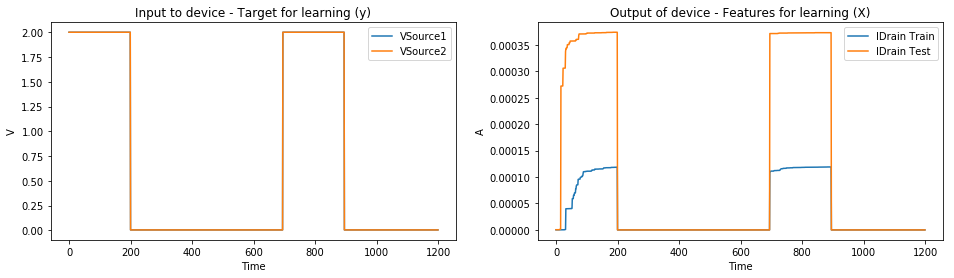

In [204]:
# Explore
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(VSource1_Train.ravel(), label = 'VSource1'); axes[0].plot(VSource1_Test.ravel(), label = 'VSource2')
axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
axes[0].legend()
axes[1].plot(IDrain1_Train.ravel(), label = 'IDrain Train'); axes[1].plot(IDrain1_Test.ravel(), label = 'IDrain Test')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

# fig.savefig(save_path + filename_train_save + m + '_Training_Parameters_'+datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
# fig.savefig(save_path + filename_train_save + m +'_Training_Parameters_'+datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')

In [205]:
# Split the data
start_time = 0
# X = np.hstack([IDrain1_Train, IDrain2_Train])[start_time:]
X = IDrain1_Train[start_time:].reshape(-1,1)

y = VSource1_Train[start_time:].reshape(-1,1)
y = (y == np.nanmax(y))

X_Test=IDrain1_Test[start_time:].reshape(-1,1)
y_Test=VSource1_Test[start_time:].reshape(-1,1)
y_Test = (y_Test == np.nanmax(y_Test))
# y2 = VSource2_Train[start_time:].ravel()
# y2 = (y2 == np.nanmax(y2)) * 2
# if multi_class:
#     y = y + y2

# # X[:,1] = X[:,1] / X[:,0]
# scalar = StandardScaler()
# # scalar = Normalizer(norm = 'l2')
# X = scalar.fit_transform(X)
# # # X = (X - X.mean(axis = 0)) / X.std(axis = 0)
# # # X = (X - X.mean(axis = 0)) / X.std(axis = 0)
# # # X = (X - X.mean(axis = 1)) / X.std(axis = 1)
# # X = np.asarray(X) * 1

# # sns.kdeplot(X[:,0][y], X[:,1][y])
# # sns.kdeplot(X[:,0][~y], X[:,1][~y])
# fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# axes[0].scatter(X[:,0], X[:,1], c = y, marker = 'x', cmap = 'Set1', alpha = 0.1);

# axes[1].plot(X[:,0], label = 'IDrain1'); axes[1].plot(X[:,1], label = 'IDrain2')
# axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
# axes[1].legend()

In [206]:
list(zip(range(len(classifier[0])), classifier[0]))

[(0, 0.0),
 (1, 0.0),
 (2, 1.0),
 (3, 3.0),
 (4, 0.0),
 (5, 1.0),
 (6, 0.0),
 (7, 3.0),
 (8, 3.0),
 (9, 1.0),
 (10, 1.0),
 (11, 3.0),
 (12, 3.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 2.0),
 (17, 3.0),
 (18, 3.0),
 (19, 0.0),
 (20, 3.0),
 (21, 1.0),
 (22, 0.0),
 (23, 0.0),
 (24, 2.0),
 (25, 3.0),
 (26, 3.0),
 (27, 1.0),
 (28, 3.0),
 (29, 3.0),
 (30, 3.0),
 (31, 0.0),
 (32, 0.0),
 (33, 3.0),
 (34, 2.0),
 (35, 1.0),
 (36, 0.0),
 (37, 3.0),
 (38, 3.0),
 (39, 0.0),
 (40, 1.0),
 (41, 2.0),
 (42, 2.0),
 (43, 3.0),
 (44, 0.0),
 (45, 0.0),
 (46, 3.0),
 (47, 1.0),
 (48, 3.0),
 (49, 3.0),
 (50, 3.0),
 (51, 1.0),
 (52, 1.0),
 (53, 3.0),
 (54, 3.0),
 (55, 3.0),
 (56, 0.0),
 (57, 1.0),
 (58, 3.0),
 (59, 3.0),
 (60, 3.0),
 (61, 1.0),
 (62, 0.0),
 (63, 3.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 3.0),
 (68, 0.0),
 (69, 3.0),
 (70, 0.0),
 (71, 1.0),
 (72, 3.0),
 (73, 3.0),
 (74, 1.0),
 (75, 3.0),
 (76, 0.0),
 (77, 3.0),
 (78, 0.0),
 (79, 1.0),
 (80, 1.0),
 (81, 3.0),
 (82, 3.0),
 (83, 0.0),
 (

In [207]:
# Training
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state = 0)

# if test_type=='SVM':
#  clf = SVC(kernel = kernel_type, C = 1, probability = True).fit(X_train, y_train) #change kernel here
# elif test_type=='LDA':
clf = LinearDiscriminantAnalysis().fit(X, y)
# clf = RandomForestClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_Test)

print('Test accuracy:', clf.score(X_Test, y_Test))

Test accuracy: 0.9866666666666667


C:\Users\aloe8475\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
# y_pred

In [146]:
# clf.predict_proba(X_test)

In [147]:
# Plot
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

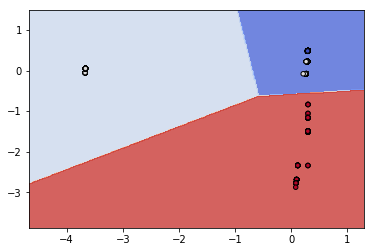

In [148]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

fig.savefig(save_path + filename_train_save + m + '_Training_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
fig.savefig(save_path + filename_train_save + m + '_Training_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')


In [149]:
# Load the test data
data_test = loadmat(filename_test)

In [150]:
IDrain = data_test['IDrain']#.todense()
VSource = data_test['VSource']
IDrain1_Test=IDrain[:,0].todense()
IDrain2_Test=IDrain[:,1].todense()
VSource1_Test=VSource[:,0]
VSource2_Test=VSource[:,1]

In [151]:
new_start_time = 0
X_test = np.hstack([IDrain1_Test, IDrain2_Test])[new_start_time:]

# X[:,1] = X[:,1] / X[:,0]
X_test = scalar.transform(X_test)
# scalar = Normalizer(norm = 'l1')
# X_test = scalar.transform(X_test)
# X_test = (X_test - X_test[start_time:].mean(axis = 0)) / X_test[start_time:].std(axis = 0)
# X_test = (X_test - X_test.mean(axis = 1)) / X_test.std(axis = 1)

# X_test = (X_test - X_test.mean(axis = 0)) / X_test.std(axis = 0)
# X = (X - X.mean(axis = 1)) / X.std(axis = 1)
X_test = np.asarray(X_test) * 1

y = VSource1_Test[new_start_time:].ravel()
y = (y == y.max())
y2 = VSource2_Test[new_start_time:].ravel()
y2 = (y2 == np.nanmax(y2)) * 2
if multi_class:
    y_test = y + y2

y_pred = clf.predict(X_test)

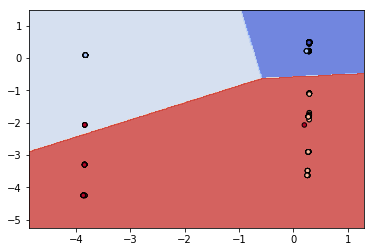

In [152]:
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m +  '_Testing_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m + '_Testing_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')

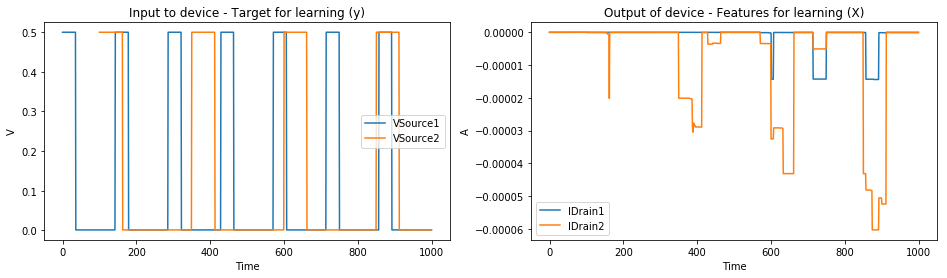

In [153]:
# Explore
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(VSource1_Test, label = 'VSource1'); axes[0].plot(VSource2_Test, label = 'VSource2')
axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
axes[0].legend()
axes[1].plot(IDrain1_Test, label = 'IDrain1'); axes[1].plot(IDrain2_Test, label = 'IDrain2')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m + '_Testing_Parameters_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m + '_Testing_Parameters_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')

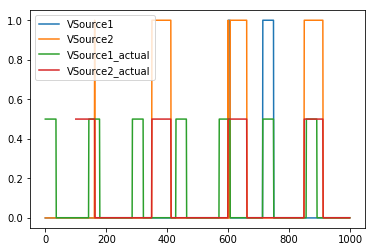

In [154]:
plt.plot(y_pred == 1, label = 'VSource1')
plt.plot(y_pred == 2, label = 'VSource2')
plt.plot(VSource1_Test, label = 'VSource1_actual')
plt.plot(VSource2_Test, label = 'VSource2_actual')
plt.legend()
plt.savefig(save_path + filename_train_save + '_' + filename_test_save + '_' + test_type + m +  '_Prediction_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
plt.savefig(save_path + filename_train_save + '_' + filename_test_save + '_' + test_type + m + '_Prediction_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')